In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [4]:
dataset = pd.read_csv(r'C:\Users\HP\Desktop\Introduction to Data Science\Bank-Additional-Full1.csv')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
dataset['job'].mapping={'housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'}
data= dataset.replace({'housemaid':101, 'services':102, 'admin.':103, 'blue-collar':104, 'technician':105,
       'retired':106, 'management':107, 'unemployed':108, 'self-employed':109, 'unknown':99,
       'entrepreneur':110, 'student':111})
dataset['marital'].mapping={'married':2,'single':1,'divorced':3,'unknown':99}
data= data.replace({'married': 2, 'single': 1, 'divorced' : 3,'unknown':99,})
dataset['education'].mapping={'basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'}
data= data.replace({'basic.4y':4, 'high.school':20, 'basic.6y':6, 'basic.9y':9,
       'professional.course':30, 'unknown':99, 'university.degree':40,
       'illiterate':50})
dataset['default'].mapping={'no', 'unknown', 'yes'}
data= data.replace({'no':1, 'unknown':99, 'yes':11})
dataset['housing'].mapping={'no', 'unknown', 'yes'}
data= data.replace({'no':1, 'unknown':99, 'yes':11})
dataset['loan'].mapping={'no', 'unknown', 'yes'}
data= data.replace({'no':1, 'unknown':99, 'yes':11})
dataset['contact'].mapping={'telephone', 'cellular'}
data= data.replace({'telephone':1, 'cellular':2})
dataset['month'].mapping={'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'}
data= data.replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,
       'sep':9})
dataset['day_of_week'].mapping={'mon', 'tue', 'wed', 'thu', 'fri'}
data= data.replace({'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6})
dataset['poutcome'].mapping={'nonexistent', 'failure', 'success'}
data= data.replace({'nonexistent':1, 'failure':2, 'success':3})
dataset['y'].mapping={'no', 'yes'}
data= data.replace({'no':2, 'yes':1})

In [7]:
data= dataset.replace({'married': 2, 'single': 1, 'divorced' : 3,'unknown':99,'housemaid' : 1, 'services' : 2, 'admin.' : 3, 'blue-collar' : 4, 'technician' : 5,'retired' : 6, 'management' : 7, 'unemployed' : 8, 'self-employed' : 9,'entrepreneur' : 10, 'student' : 11,'basic.4y' : 2, 'high.school' : 1, 'basic.6y' : 2, 'basic.9y' : 2,'professional.course' : 3,'university.degree' : 4,'illiterate' : 5,'yes' : 1, 'no' : 0,'telephone' : 1, 'cellular' : 2, 'mar' : 3, 'apr' : 4,'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9,'oct' : 10, 'nov' : 11, 'dec' : 12,'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5,'nonexistent' : 2, 'failure' : 0, 'success' : 1})

In [8]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,2,0,0,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
1,57,2,2,1,99,0,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
2,37,2,2,1,0,1,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
3,40,3,2,2,0,0,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
4,56,2,2,1,0,0,1,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,3,0,1,0,2,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4964,1
41184,46,4,2,3,0,0,0,2,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4964,0
41185,56,6,2,4,0,1,0,2,11,5,...,2,999,0,2,-1.1,94.767,-50.8,1.028,4964,0
41186,44,5,2,3,0,0,0,2,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4964,1


In [9]:
#data exploaration

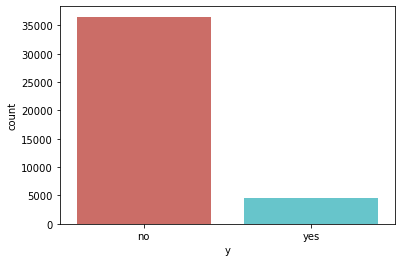

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x='y',data=dataset, palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
#data visualisation

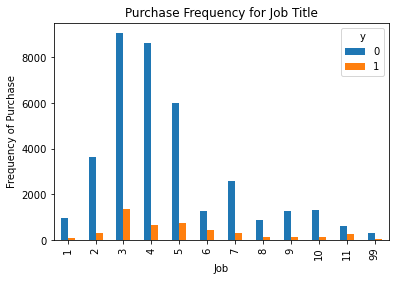

In [12]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

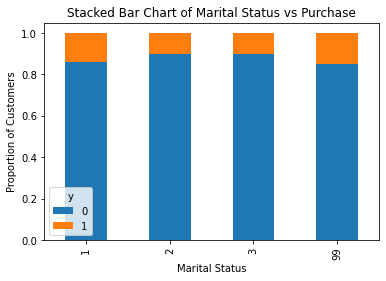

In [13]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


In [14]:
#Education seems a good predictor of the outcome variable

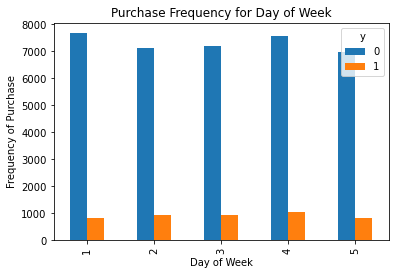

In [17]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

In [18]:
#Day of week may not be a good predictor of the outcome.

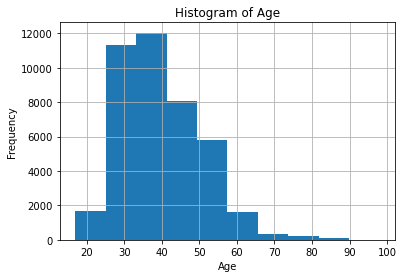

In [19]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [20]:
#Most of the customers of the bank in this dataset are in the age range of 30–40.

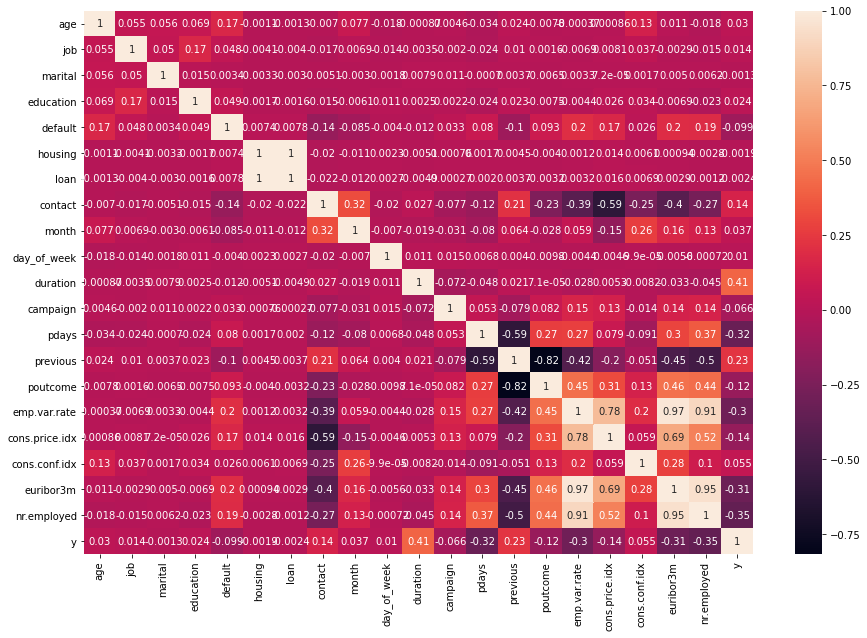

In [21]:
data = pd.DataFrame(data,columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y'])
plt.figure(figsize=(15,10))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X=data[columns]
y=data['y']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"no.of training examples:{y_train.shape[0]}")
print(f"no.of testing examples:{y_test.shape[0]}")

(28831, 20) (12357, 20) (28831,) (12357,)
no.of training examples:28831
no.of testing examples:12357


In [10]:
#defined functions for confusion matrix and roc auc 

In [17]:
def model_matrices(pred):
    cm = confusion_matrix(y_test, pred)
    print(cm)

    ax=sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',linewidths= 5,cmap="Reds")

    ax.set_xlabel("\nPredicted Values") 
    ax.set_ylabel("Actual values");

In [18]:
def draw_roc(model_name,classifier,pred):
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
    print('AUC:', auc_score)
    plt.plot(fpr,tpr,label=" area under curve="+str(auc_score))
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate - Specificity ")
    plt.ylabel("True Positive Rate - Sensitivity")
    plt.title("ROC for predicting Deposits")
    plt.show()

In [67]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
pred_lr=lr.predict(X_test)
acclr= metrics.accuracy_score(y_test,pred_lr)
print("Accuracy:", acclr*100, "%")

Accuracy: 90.54786760540584 %


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print('Classification Report:')
print(classification_report(y_test,pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10903
           1       0.68      0.37      0.48      1454

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357



[[10652   251]
 [  917   537]]


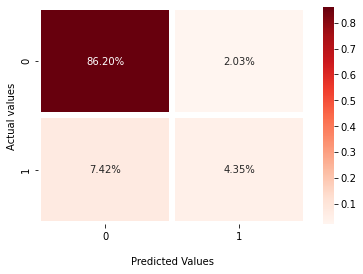

In [44]:
model_matrices(pred_lr)

AUC: 0.9188431158795435


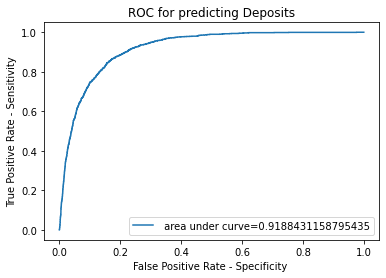

In [49]:
draw_roc('LogisticRegression',lr,pred_lr)

In [68]:
lr=LogisticRegression(max_iter=400)
lr.fit(X_train, y_train)
pred_lr=lr.predict(X_test)
acclr= metrics.accuracy_score(y_test,pred_lr)
print("Accuracy:", acclr*100, "%")

Accuracy: 90.73399692481993 %


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#naive bayes

In [18]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb=gnb.predict(X_test)
accgnb= metrics.accuracy_score(y_test,pred_gnb)
print("Accuracy:", accgnb*100, "%")
precgnb= metrics.precision_score(y_test,pred_gnb)
print ("Precision:",precgnb*100, "%")
print ("Recall:", metrics.recall_score(y_test,pred_gnb))
print ("f1 score:",metrics.f1_score(y_test,pred_gnb))

Accuracy: 84.13045237517197 %
Precision: 38.82767739092111 %
Recall: 0.6059147180192572
f1 score: 0.47327424120333067


In [62]:
print('Classification Report:')
print(classification_report(y_test, pred_gnb))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     10903
           1       0.39      0.61      0.47      1454

    accuracy                           0.84     12357
   macro avg       0.67      0.74      0.69     12357
weighted avg       0.88      0.84      0.86     12357



[[9515 1388]
 [ 573  881]]


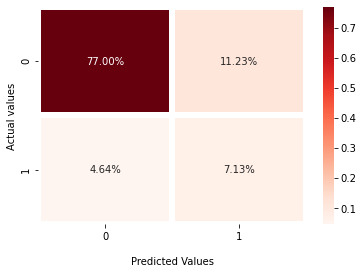

In [19]:
model_matrices(pred_gnb)

AUC: 0.8488077811578683


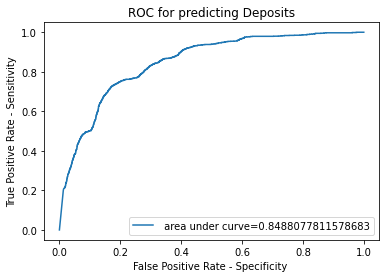

In [50]:
draw_roc('GaussianNB',gnb,pred_gnb)

In [69]:
knc=KNeighborsClassifier()
knc.fit(X_train, y_train)
pred_knc=knc.predict(X_test)
accknc= metrics.accuracy_score(y_test,pred_knc)
print("Accuracy:", accknc*100, "%")

Accuracy: 90.34555312778181 %


In [63]:
print('Classification Report:')
print(classification_report(y_test, pred_knc))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10903
           1       0.62      0.46      0.53      1454

    accuracy                           0.90     12357
   macro avg       0.78      0.71      0.74     12357
weighted avg       0.89      0.90      0.90     12357



[[10498   405]
 [  788   666]]


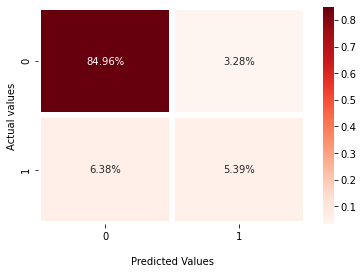

In [23]:
model_matrices(pred_knc)

AUC: 0.8701168273790096


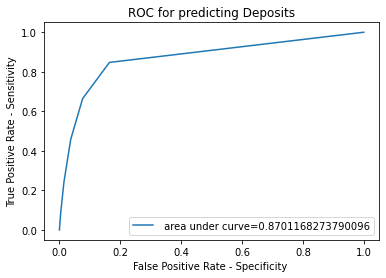

In [51]:
draw_roc('KNeighborsClassifier',knc,pred_knc)

In [25]:
#same results

In [70]:
dtc=DecisionTreeClassifier(max_depth=None)
dtc.fit(X_train, y_train)
pred_dtc=dtc.predict(X_test)
accdtc= metrics.accuracy_score(y_test,pred_dtc)
print("Accuracy:", accdtc*100, "%")

Accuracy: 88.73512988589464 %


In [64]:
print('Classification Report:')
print(classification_report(y_test, pred_dtc))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10903
           1       0.51      0.53      0.52      1454

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



[[10183   720]
 [  680   774]]


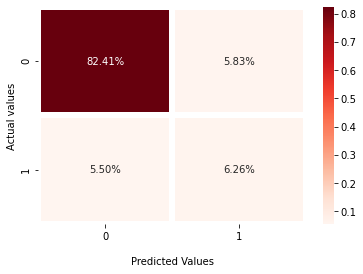

In [27]:
model_matrices(pred_dtc)

AUC: 0.7318828178607885


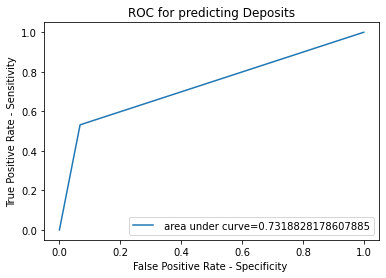

In [52]:
draw_roc('DecisionTreeClassifier',dtc,pred_dtc)

In [71]:
dtc_t=DecisionTreeClassifier(max_depth=400)
dtc_t.fit(X_train, y_train)
pred_dtc_t=dtc_t.predict(X_test)
accdtc_t= metrics.accuracy_score(y_test,pred_dtc_t)
print("Accuracy:", accdtc*100, "%")

Accuracy: 88.73512988589464 %


AUC: 0.7335564798553103


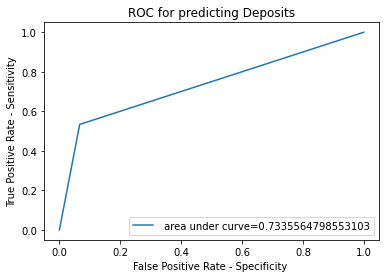

In [53]:
draw_roc('DecisionTreeClassifier',dtc_t,pred_dtc_t)

In [19]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
accrfc= metrics.accuracy_score(y_test,pred_rfc)
print("Accuracy:", accrfc*100, "%")

Accuracy: 91.18718135469774 %


In [65]:
print('Classification Report:')
print(classification_report(y_test, pred_rfc))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10903
           1       0.66      0.47      0.55      1454

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



[[10547   356]
 [  765   689]]


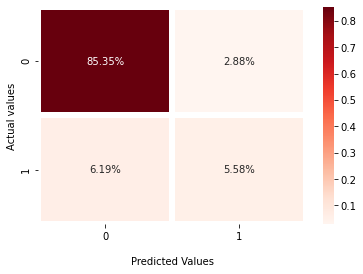

In [31]:
model_matrices(pred_rfc)

AUC: 0.9432464103553646


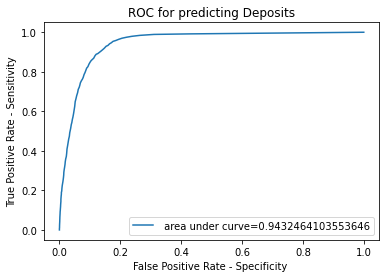

In [54]:
draw_roc('RandomForestClassifier',rfc,pred_rfc)

In [20]:
rfc = RandomForestClassifier(max_depth=None, random_state=0,n_estimators=300)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
print('Random Forest')
print('Accuracy : {}'.format(accuracy_score(y_test, pred_rfc)))

Random Forest
Accuracy : 0.9113862588006798


In [73]:
xgbc=XGBClassifier()
xgbc.fit(X_train, y_train)
pred_xgbc=xgbc.predict(X_test)
accxgbc= metrics.accuracy_score(y_test,pred_xgbc)
print("Accuracy:", accxgbc*100, "%")

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:43:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 91.26810714574735 %


In [66]:
print('Classification Report:')
print(classification_report(y_test, pred_xgbc))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10903
           1       0.66      0.53      0.59      1454

    accuracy                           0.91     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



[[10513   390]
 [  689   765]]


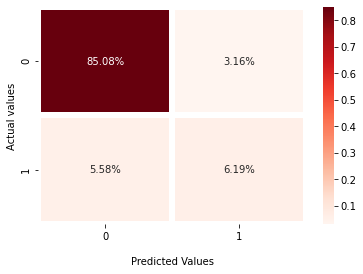

In [34]:
model_matrices(pred_xgbc)

AUC: 0.9477327328482841


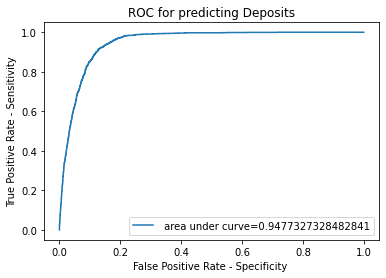

In [55]:
draw_roc('XGBClassifier',xgbc,pred_xgbc)